In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

In [2]:
data=pd.read_csv('diagnosis.data',sep='\t',encoding='utf-16',header=None,names=["Temperature","Nausea","Lumbar Pain",
                                                                                 "Urine Pushing","Micturition pains","Burning","Inflammation","Nephritis"])


def temperature(temperature):
    if ',' in temperature:
        temperature=temperature.replace(',','.')
    return temperature

data["Temperature"]=data.apply(lambda row:temperature(row["Temperature"]),axis=1)

data['Temperature']=data['Temperature'].astype('float')

def boolean_conv(info):
    if info=='no':
        info=0
    else:
        info=1
    return info


data["Nausea"]=data.apply(lambda row:boolean_conv(row["Nausea"]),axis=1)
data["Lumbar Pain"]=data.apply(lambda row:boolean_conv(row["Lumbar Pain"]),axis=1)
data["Urine Pushing"]=data.apply(lambda row:boolean_conv(row["Urine Pushing"]),axis=1)
data["Micturition pains"]=data.apply(lambda row:boolean_conv(row["Micturition pains"]),axis=1)
data["Burning"]=data.apply(lambda row:boolean_conv(row["Burning"]),axis=1)
data["Inflammation"]=data.apply(lambda row:boolean_conv(row["Inflammation"]),axis=1)
data["Nephritis"]=data.apply(lambda row:boolean_conv(row["Nephritis"]),axis=1)

nephritisAndInflamation=[]

def addColumn(nephritis, inflamation):
    onlyNephritis=[0 for i in range(len(nephritis))]
    onlyInflamation=[0 for i in range(len(nephritis))]
    bothNephritisAndInflamation=[0 for i in range(len(nephritis))]
    none=[0 for i in range(len(nephritis))]
    for i in range(len(nephritis)):
        if nephritis[i]==1 and inflamation[i]==1:
            bothNephritisAndInflamation[i]=1
        elif nephritis[i]==0 and inflamation[i]==1:
            onlyInflamation[i]=1
        elif nephritis[i]==1 and inflamation[i]==0:
            onlyNephritis[i]=1
        else:
            none[i]=1
    return (onlyNephritis, onlyInflamation, bothNephritisAndInflamation, none)
        
            

(onlyNephritis, onlyInflamation, bothNephritisAndInflamation, none) = addColumn(data["Nephritis"], data["Inflammation"])
data["onlyNephritis"]=onlyNephritis
data["onlyInflammation"]=onlyInflamation
data["bothNephritisAndInflamation"]=bothNephritisAndInflamation
data["none"]=none

data=data.drop(["Nephritis", "Inflammation"], axis = 1)

In [3]:
from sklearn.model_selection import train_test_split
X = data[['Temperature', 'Nausea', 'Lumbar Pain', 'Urine Pushing', 'Micturition pains', 'Burning']]
y = data[data.columns[6:10]]

y=y.to_numpy()

y = (y == 1).argmax(axis=1)
print(y)

ratio_test = 0.2

# Produces test split.
x_train, x_test, y_train, y_test = train_test_split(
X, y, test_size=ratio_test, random_state=42, shuffle=True)
type(x_train)
# x_test.shape

[3 1 3 1 3 3 1 3 1 1 1 3 3 1 3 3 1 1 1 3 1 1 3 1 1 1 1 1 3 1 1 1 3 1 3 1 1
 3 1 1 3 3 1 1 1 1 1 1 1 1 3 1 3 1 1 1 1 3 1 1 0 0 0 0 0 0 0 0 0 0 2 2 2 3
 3 0 0 0 2 2 3 0 0 2 2 2 3 0 2 2 3 0 2 2 3 0 0 0 2 2 0 2 3 0 0 2 2 3 0 0 2
 3 0 0 2 0 3 0 0 0]


pandas.core.frame.DataFrame

## Multi class Logistic Regression Using OVR
* Since we are going to use One Vs Rest algorithm, set >  multi_class='ovr'
* Note: since we are using One Vs Rest algorithm we must use 'liblinear' solver with it.

In [4]:

# evaluate multinomial logistic regression model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression



lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(x_train, y_train)


LogisticRegression(multi_class='ovr', solver='liblinear')

## Model Score
Check the model score using test data

In [6]:
lm.score(x_test, y_test)

1.0

## Confusion Matrix
* Confusion matrix helps to visualize the performance of the model
* The diagonal elements represent the number of points for which the predicted label is equal to the true label
* Off-diagonal elements are those that are mislabeled by the classifier.
* The higher the diagonal values of the confusion matrix the better, indicating many correct
 
Let's create confusion matrix using sklearn library and test data

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[6, 0, 0, 0],
       [0, 9, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 6]])

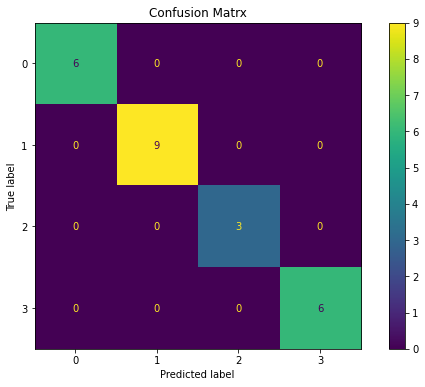

In [11]:
#Creating matplotlib axes object to assign figuresize and figure title
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(lm, x_test, y_test, ax = ax)
disp.confusion_matrix

## Classification Report
Classification report is used to measure the quality of prediction from classification algorithm
 
* Precision: Indicates how many classes are correctly classified
* Recall: Indicates what proportions of actual positives was identified correctly
* F-Score: It is the harmonic mean between precision & recall
* Support: It is the number of occurrence of the given class in our dataset

In [12]:
print(metrics.classification_report(y_test, lm.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

